In [42]:
import os
import numpy as np


class ComsolEFieldData:
    @classmethod
    def read_comsol_pt_data(cls, com_text):
        all_x = []
        all_y = []
        all_Ex = []
        all_Ey = []
        
        for line in com_text.split("\n"):
            if line.startswith("%"):
                continue
            if len(line) == 0:
                continue
            xtext, ytext, E_x_text, E_y_text, E_z_text = line.split()
            # print(line.split())
            xcoord = float(xtext)
            ycoord = float(ytext)
            E_x = None if E_x_text == "NaN" else float(E_x_text)
            E_y = None if E_y_text == "NaN" else float(E_y_text)
            E_z = None if E_z_text == "NaN" else float(E_z_text)
            # print(E_x)
            if E_x is None or E_y is None or E_z is None:
                continue
            all_x.append(xcoord)
            all_y.append(ycoord)
            # E = [
            #     E_x,
            #     E_y,
            #     E_z,
            # ]
            all_Ex.append(E_x)
            all_Ey.append(E_y)

        return {
            "x_vals": all_x,
            "y_vals": all_y,
            "Ex_vals": all_Ex,
            "Ey_vals": all_Ey,
        }
    
    @classmethod
    def _calculate_grid_spacing(cls, xvals, yvals):
        unique_sorted_xvals = np.sort(np.unique(xvals))
        unique_sorted_yvals = np.sort(np.unique(yvals))

        xspaces = unique_sorted_xvals[1:] - unique_sorted_xvals[:-1]
        yspaces = unique_sorted_yvals[1:] - unique_sorted_yvals[:-1]

        grid_spacing = xspaces[0]

        if not np.all(np.isclose(np.full_like(xspaces, grid_spacing), xspaces)):
            raise ValueError("X spaces don't all match: {}".format(xspaces))
        if not np.all(np.isclose(np.full_like(yspaces, grid_spacing), yspaces)):
            raise ValueError("Y and X spaces don't match: {} & {}".format(xspaces, yspaces))

        return grid_spacing

    # def turn_comsol_pts_into_fieldgrid(

    # @classmethod
    # def _get_min_xy(cls, x
    
    @classmethod
    def from_comsol_export_text(cls, com_text):
        pointwise_field_vals = cls.read_comsol_pt_data(com_text)
        grid_spacing = cls._calculate_grid_spacing(
            pointwise_field_vals["x_vals"],
            pointwise_field_vals["y_vals"],
        )
        print(grid_spacing)
        xorigin = min(pointwise_field_vals["x_vals"])
        yorigin = min(pointwise_field_vals["y_vals"])
        print(xorigin)
        print(yorigin)
        # print(pointwise_field_vals)
        
        return pointwise_field_vals
        # return ComsolEFieldData(
        # )
        
    def __init__(self):
        pass
        # self._xvals = xvals
        # self._yvals = yvals
        # self._Efield_vals = Efield_vals

        # return xspaces

# def read_comsol_efield_data(com_text):

with open("/Users/paulkreymborg/Downloads/PIES_converging_EFIELD.txt", "r") as f:
    pies_efield_comsol_text = f.read()
    
    comsol_data = ComsolEFieldData.from_comsol_export_text(pies_efield_comsol_text)

# comsol_data
# comsol_data.calculate_grid_spacing()
#         comsol_data["x"],
#         comsol_data["y"],

#     comsol_data["Ex"],
#     comsol_data["Ey"],
# )


0.15700000000000003
-7.7715
-7.7715


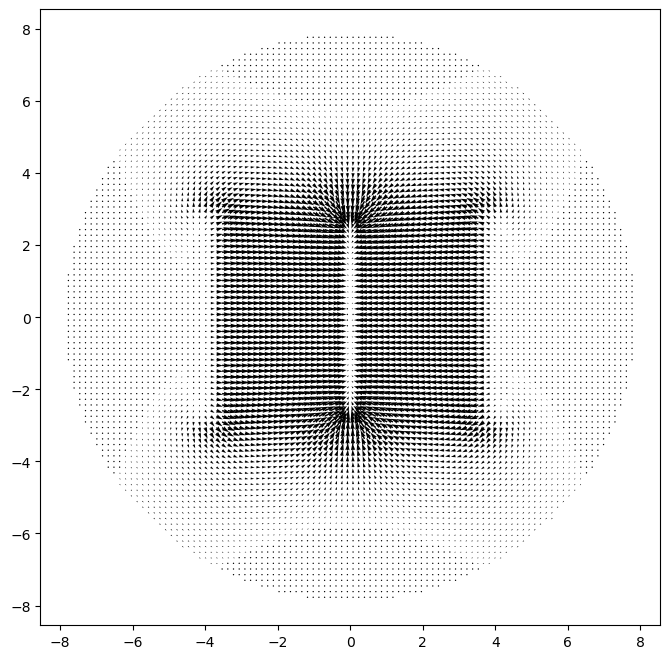

In [43]:

# from matplotlib import pyplot as plt

# for name, lis in comsol_data.items():
#     print(name, end=": ")
#     print(len(lis))

fig, ax = plt.subplots(figsize=(8,8))
ax.quiver(
    comsol_data["x_vals"],
    comsol_data["y_vals"],
    comsol_data["Ex_vals"],
    comsol_data["Ey_vals"],
)